In [3]:
# Analyze Accuracy of Live Dead Predictions

import pandas as pd
import os
import sys
import glob
from os.path import expanduser
import matplotlib.pyplot as plt                   # For graphics
import numpy as np
%matplotlib inline




%load_ext autoreload
%reload_ext autoreload
%autoreload 2


from pysd2cat.analysis import live_dead_analysis as lda

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
accuracy = pd.read_csv('../resources/accuracy_set.csv', dtype={'input': str})



In [5]:

drop_columns = ['Unnamed: 0', 'SynBioHub URI', 'Unnamed: 0.1', 'calibration_id', 'experiment_id', 'filename', 
                'glycerol_plate_index',  'growth_media_1', 'growth_media_2',  
                'inc_temp', 'inc_time_1', 'inc_time_2', 'input', 'lab', 'lab_id', 'media', 'od', 
                'od_cutoff', 'output', 'part_1_id', 'part_2_id', 'plate_id',  'replicate', 'source_container', 
                'strain_name', 'strain_circuit', 'well', 'post_well']
od_df = pd.read_csv(os.path.join(os.getcwd(), '../resources/tx_od.csv')).rename(columns={'strain' : 'strain_name'}).drop(columns=drop_columns)
#print(od_df['inc_time_2'].unique())
#print(df.columns.values)
accuracy = accuracy.merge(od_df, on='id', how='left')
#df



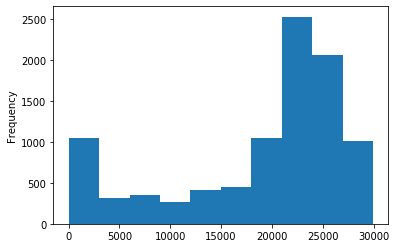

In [5]:
accuracy['count_live'].plot.hist()

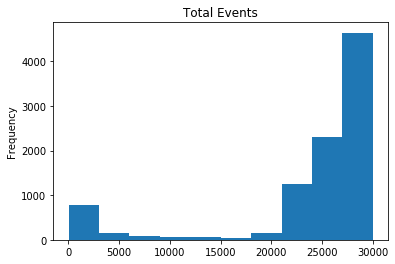

In [6]:
accuracy['count'].plot.hist(title='Total Events', label='Events')

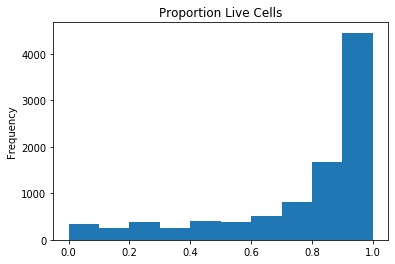

In [7]:
accuracy['proportion_live'] = accuracy.apply(lambda x: x['count_live']/x['count'], axis=1)
accuracy['proportion_live'].plot.hist(title='Proportion Live Cells')

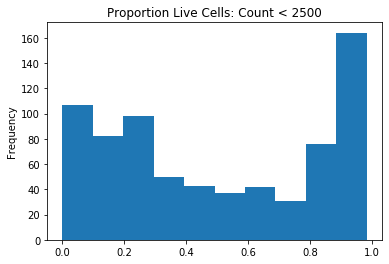

In [16]:
x=2500
accuracy.loc[accuracy['count'] < x]['proportion_live'].plot.hist(title='Proportion Live Cells: Count < '+ str(x), label='Events')

In [68]:
accuracy.columns

Index(['Unnamed: 0', 'count', 'count_live', 'experiment_id', 'filename', 'gate', 'growth_media_1', 'growth_media_2', 'id', 'inc_temp', 'inc_time_1', 'inc_time_2', 'index', 'input', 'lab', 'lab_id', 'mean_correct_classifier', 'mean_correct_classifier_live', 'mean_correct_high_classifier', 'mean_correct_high_classifier_live', 'mean_correct_high_threshold', 'mean_correct_high_threshold_live', 'mean_correct_low_classifier', 'mean_correct_low_classifier_live', 'mean_correct_low_threshold', 'mean_correct_low_threshold_live', 'mean_correct_threshold', 'mean_correct_threshold_live', 'mean_log_gfp', 'mean_log_gfp_live', 'media', 'od', 'od_cutoff', 'output', 'plan', 'plate_id', 'replicate', 'source_container', 'std_correct_classifier', 'std_correct_classifier_live', 'std_correct_high_classifier', 'std_correct_high_classifier_live', 'std_correct_high_threshold', 'std_correct_high_threshold_live', 'std_correct_low_classifier', 'std_correct_low_classifier_live', 'std_correct_low_threshold', 'std_co

In [279]:
#accuracy['growth'] = accuracy.apply(lambda x: x['inc_time_2']/np.log2(x['post_od_raw']/x['od']), axis=1)
accuracy['growth'] = accuracy.apply(lambda x: x['post_od_raw'] / x['od'], axis=1)

Text(0, 0.5, 'Final OD / Inoculation OD')

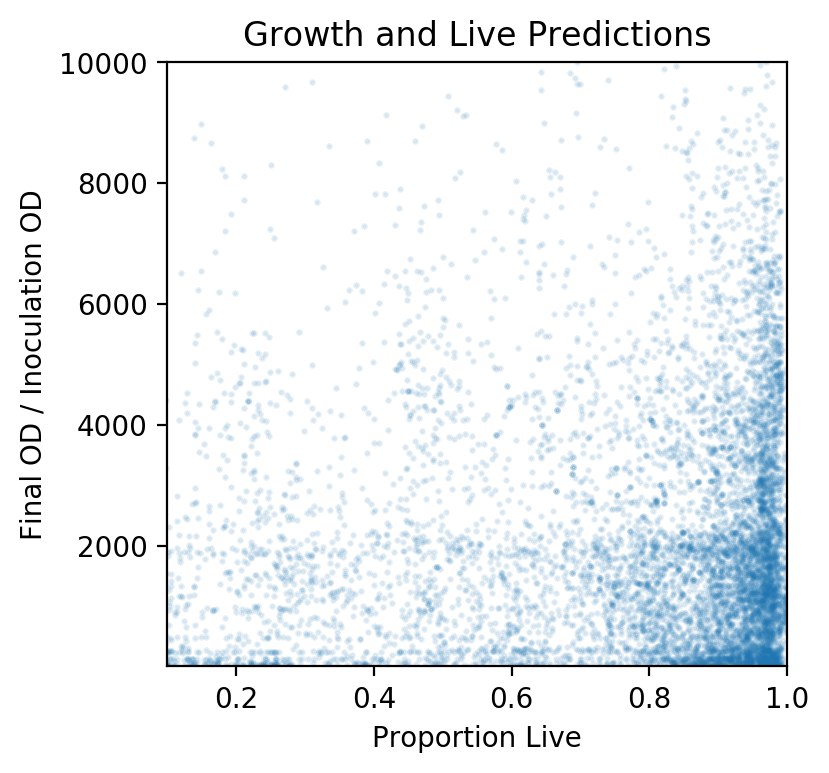

In [302]:

fig = plt.figure(dpi=200, figsize=(4,4))


ax = fig.add_subplot(111)
yval='growth'
#sval = 'growth'
xval='proportion_live'

durations=accuracy['inc_time_2'].unique()
durations.sort()
durations = [18]
for dur in durations:
    df = accuracy.loc[ #(accuracy['inc_time_2'] == dur) & \
                      (accuracy['inc_time_2'] > 0) & \
                      #(accuracy['count'] > 25000) & \
                      #(accuracy['gate'] == "OR") & \
                      #(accuracy['input'] == "01")
                      (accuracy['growth'] >= 1)
        #& \
        #              (accuracy['growth'] < 2) 
                     ]
    scatter = ax.scatter(df[xval],df[yval],
                              alpha=0.1,
                             label = str(dur),
                         s=2
                             #c=kmeans[0] #, 
                             #s=100*df[sval]
                            )
    
#ax.set(adjustable='box', aspect='equal')
#plt.legend()
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlim([0.1, 1])
ax.set_ylim([1, 10000])

ax.set_title('Growth and Live Predictions')
ax.set_xlabel("Proportion Live")
ax.set_ylabel("Final OD / Inoculation OD")
#plt.axis([0, 30000, 0, 30000])

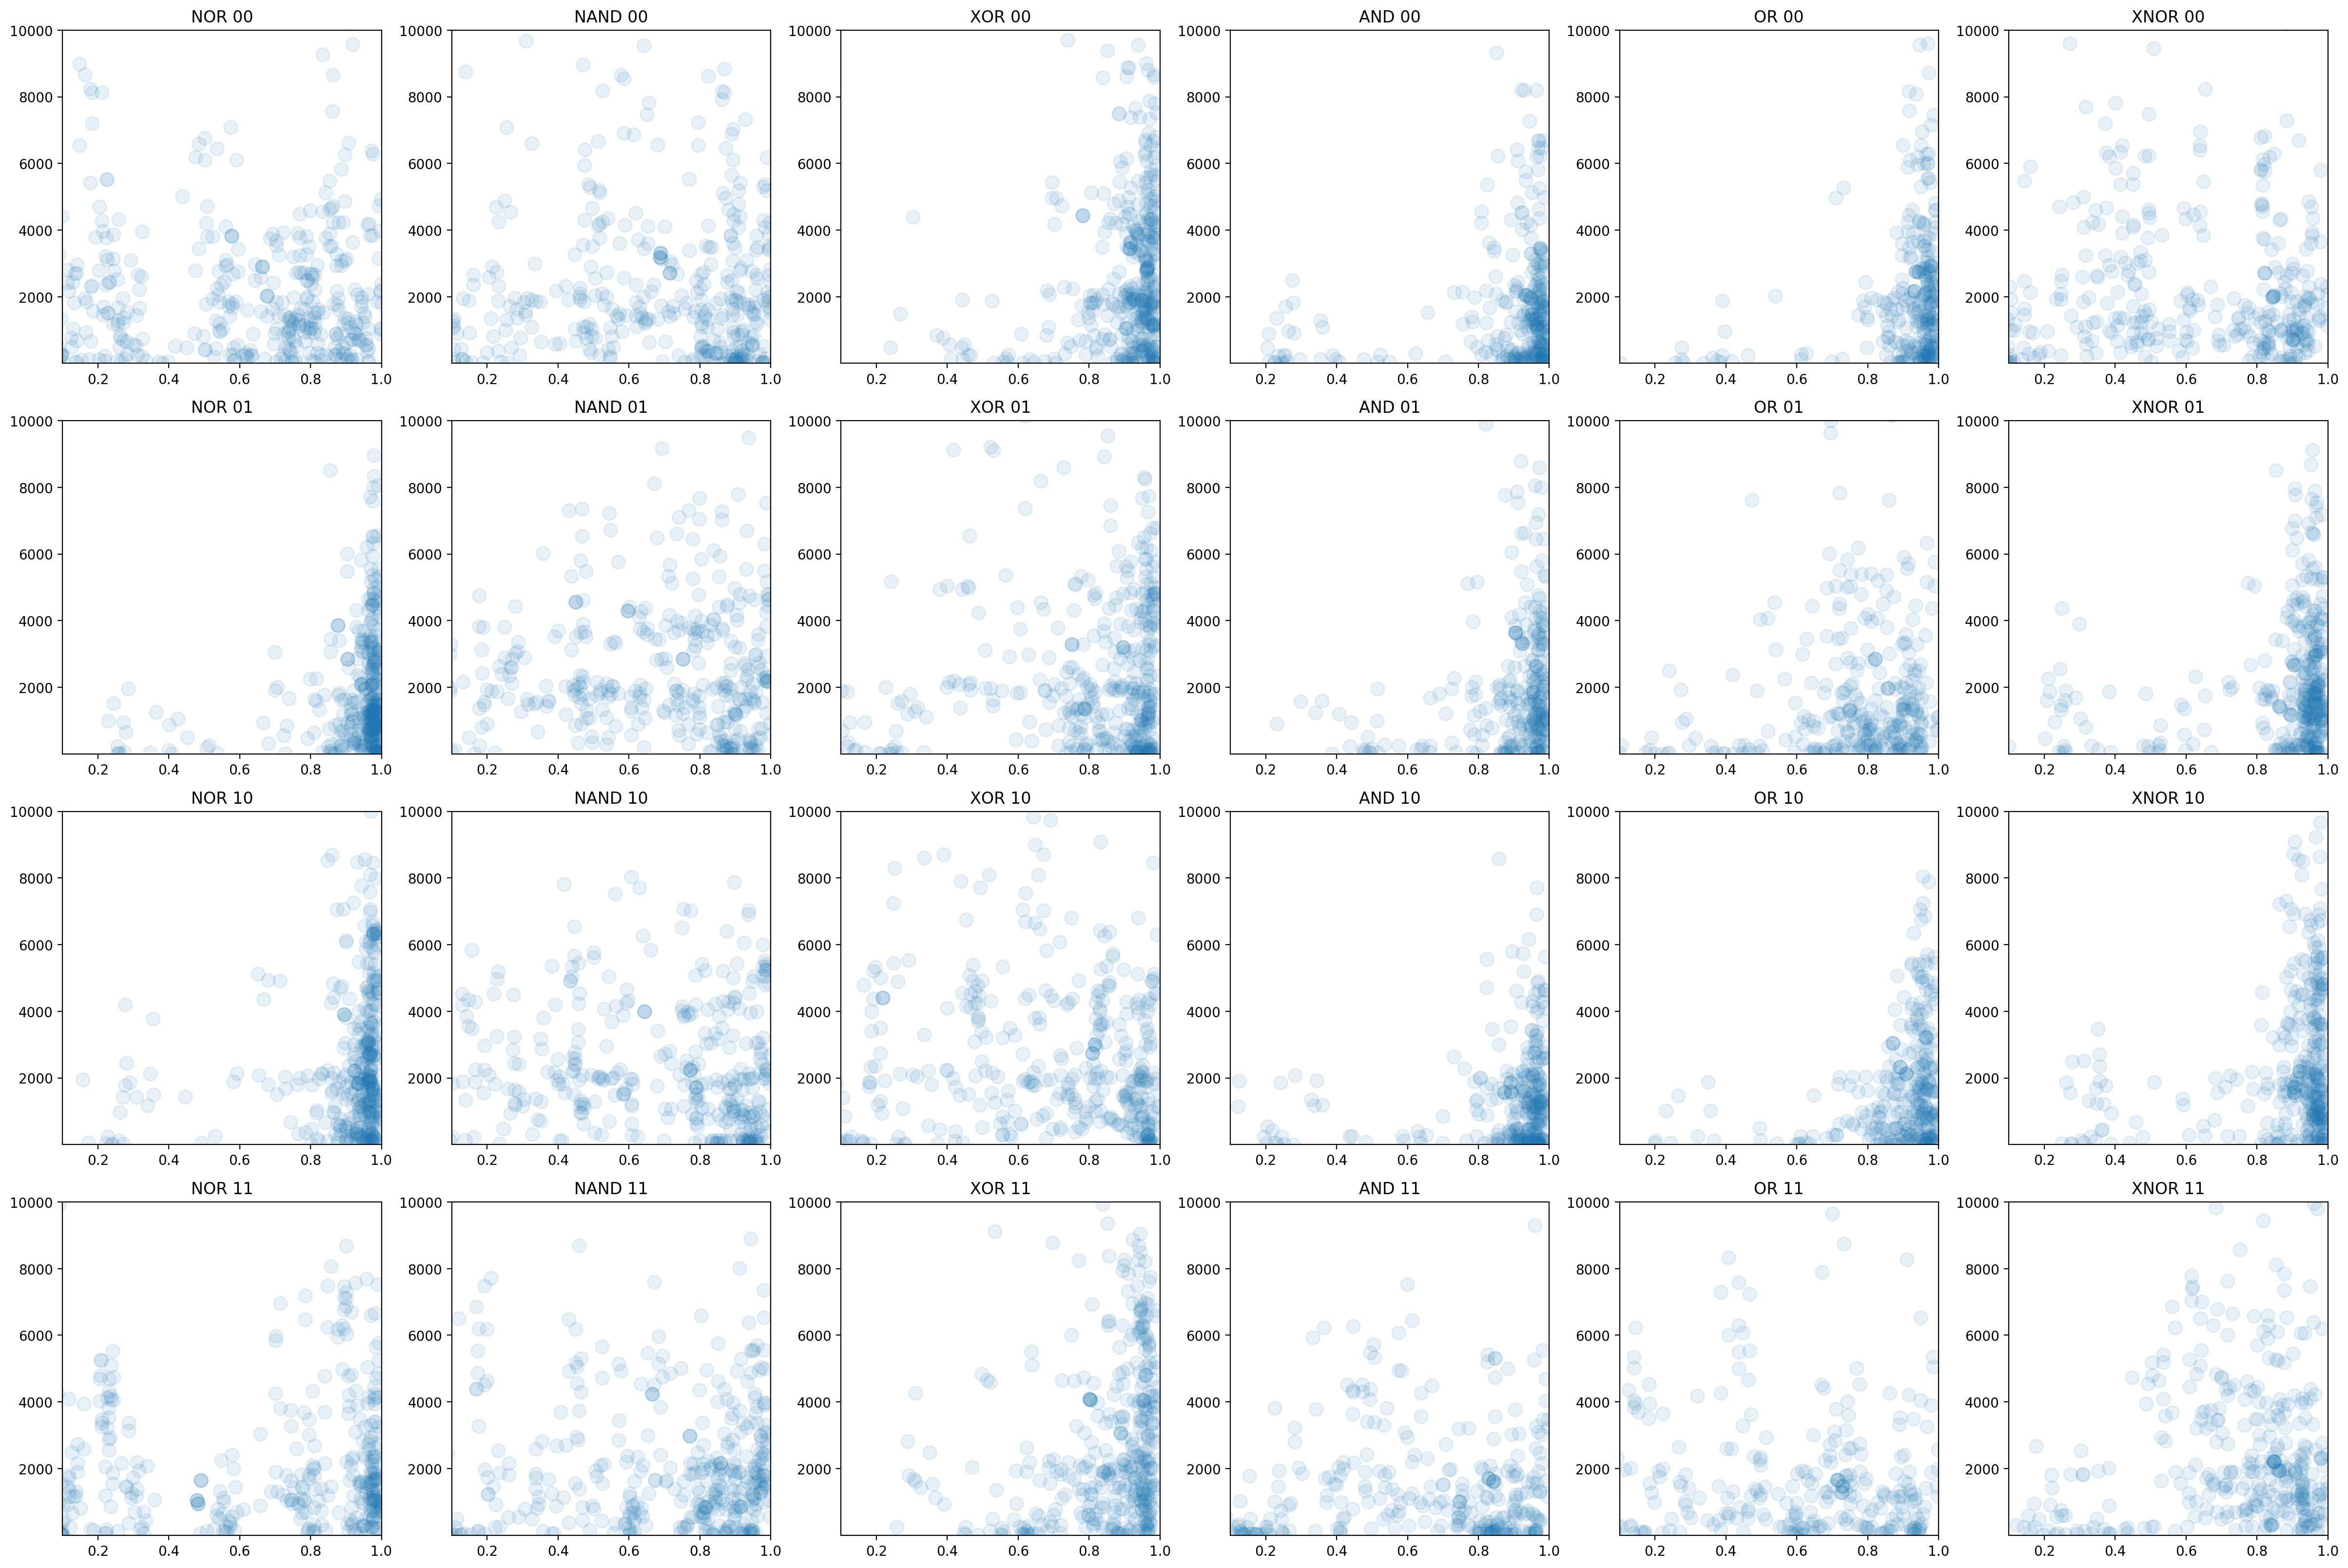

In [305]:


gates=accuracy.gate.dropna().unique()
inputs=['00', '01', '10', '11']#accuracy.input.dropna().unique()

fig = plt.figure(dpi=200, figsize=(4*len(gates),4*len(inputs)))
#fig = plt.figure(dpi=200)


yval='growth'
#sval = 'growth'
xval='proportion_live'


for j, inp in enumerate(inputs):
    for i, g in enumerate(gates):
        ax = fig.add_subplot(len(inputs), len(gates), (j*len(gates))+i+1)


        df = accuracy.loc[ #(accuracy['inc_time_2'] == dur) & \
#                          (accuracy['inc_time_2'] == 18) & \
                          #(accuracy['count'] > 25000) & \
                          (accuracy['gate'] == g) & \
                          (accuracy['input'] == inp) &\
                          (accuracy['growth'] >= 1) #& \
#                      (accuracy['growth'] < 5) 
                         ]
        scatter = ax.scatter(df[xval],df[yval],
                                  alpha=0.1,
                                 #label = str(dur),
                                 #c=kmeans[0] #, 
                                 s=100
                             
                                )
        #ax.set_ylimit()
        ax.set_title(g + " " + inp)
#        ax.set_xlabel("Proportion Live")
#        ax.set_ylabel("Avg. Change in OD / Hour")
        #ax.set(adjustable='box', aspect='equal')
        ax.set_xlim([0.1, 1])
        ax.set_ylim([1, 10000])
        #ax.set_yscale('log')
        #ax.set_xscale('log')
#plt.axis('equal')
#plt.axis([0.5, 1, 0.5, 1])
#plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


#plt.legend()


#plt.axis([0, 30000, 0, 30000])

Text(0, 0.5, 'mean_correct_classifier')

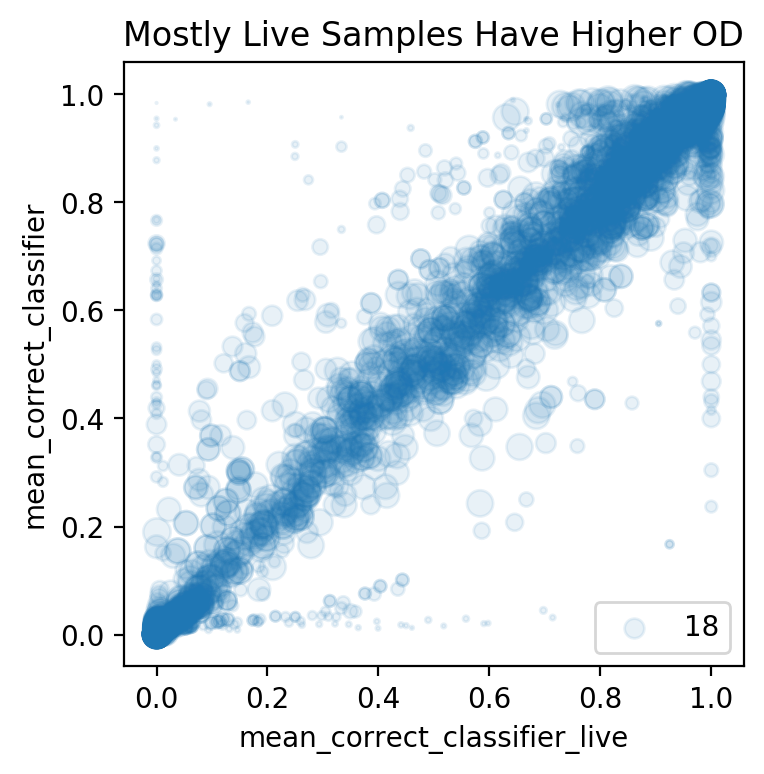

In [81]:
fig = plt.figure(dpi=200, figsize=(4,4))
ax = fig.add_subplot(111)
yval='mean_correct_classifier'
xval = 'mean_correct_classifier_live'
sval='proportion_live'

durations=accuracy['inc_time_2'].unique()
durations.sort()
durations = [18]
for dur in durations:
    df = accuracy.loc[accuracy['inc_time_2'] == dur]
    scatter = ax.scatter(df[xval],df[yval],
                              alpha=0.1,
                             label = str(dur),
                             #c=kmeans[0] #, 
                             s=100*df[sval]
                            )
    
#ax.set(adjustable='box', aspect='equal')
plt.legend()
#ax.set_yscale('log')
ax.set_title('Mostly Live Samples Have Higher OD')
ax.set_xlabel(xval)
ax.set_ylabel(yval)
#ax.set_xscale('log')
#ax.set_yscale('log')
#plt.axis([0, 30000, 0, 30000])
#plt.gca().set_aspect('equal', adjustable='box')


#plt.colorbar(scatter)